In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
df = pd.read_csv('Movie-Ratings.csv')

##print(df)

In [17]:
df.columns
##df.loc[df['Genre'] == 'Comedy']
# df['count'] = 1
# df.groupby(['Genre','Film']).count()['count']
df = df.drop(columns=['count'])

In [5]:
df.head

<bound method NDFrame.head of                       Film      Genre  Rotten Tomatoes Ratings %  \
0    (500) Days of Summer      Comedy                         87   
1              10,000 B.C.  Adventure                          9   
2               12 Rounds      Action                         30   
3                127 Hours  Adventure                         93   
4                17 Again      Comedy                         55   
..                     ...        ...                        ...   
554          Your Highness     Comedy                         26   
555        Youth in Revolt     Comedy                         68   
556                 Zodiac   Thriller                         89   
557            Zombieland      Action                         90   
558              Zookeeper     Comedy                         14   

     Audience Ratings %  Budget (million $)  Year of release  
0                    81                   8             2009  
1                    44    

In [57]:
df

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [87]:
df.sort_values('Genre', ascending=False).head(50)
# df.sort_values(['Audience Ratings %', 'Rotten Tomatoes Ratings %'], ascending=[0,0]).nlargest(10,'Rotten Tomatoes Ratings %')
# df.sort_values
# df.sort_values(['Rotten Tomatoes Ratings %','Audience Ratings %'], ascending=[0,0]).head(10)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
432,The Ides of March,Thriller,85,76,13,2011
243,Michael Clayton,Thriller,90,72,25,2007
522,Vantage Point,Thriller,35,61,40,2008
519,Valkyrie,Thriller,58,66,75,2008
515,Untraceable,Thriller,14,56,35,2008
513,Unknown,Thriller,55,57,30,2011
225,Limitless,Thriller,69,73,27,2011
503,Trespass,Thriller,11,24,35,2011
498,Traitor,Thriller,55,66,22,2008
494,Tinker Tailor Soldier Spy,Thriller,83,68,21,2011


In [57]:
df.sort_values('Audience Ratings %', ascending=False).head(10)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
406,The Dark Knight,Thriller,94,96,185,2008
9,50/50,Comedy,93,93,8,2011
530,Warrior,Action,83,93,25,2011
190,Inception,Action,86,93,160,2010
33,Avatar,Action,83,92,237,2009
362,Star Trek,Action,94,91,140,2009
387,The Artist,Drama,97,91,16,2011
394,The Bourne Ultimatum,Thriller,93,91,110,2007
196,Iron Man,Action,94,91,186,2008
428,The Help,Drama,75,91,25,2011


In [60]:
df_top = df.sort_values('Budget (million $)', ascending=False).head(10)
print(df_top[['Film','Budget (million $)']])

                                            Film  Budget (million $)
304     Pirates of the Caribbean: At World's End                 300
360                                 Spider-Man 3                 258
303  Pirates of the Caribbean: On Stranger Tides                 250
167      Harry Potter and the Half-Blood Prince                  250
33                                       Avatar                  237
314                            Quantum of Solace                 230
501         Transformers: Revenge of the Fallen                  210
327                                   Robin Hood                 200
5                                           2012                 200
400     The Chronicles of Narnia: Prince Caspian                 200


In [61]:
df_low = df.sort_values('Budget (million $)', ascending=True).head(10)
print(df_low[['Film','Budget (million $)']])

                     Film  Budget (million $)
154             Greenberg                   0
201             Jane Eyre                   0
356              Soul Men                   0
185        I'm Still Here                   0
474     The Spy Next Door                   0
487        The Uninvited                    0
287    Our Family Wedding                   0
539          When in Rome                   0
292  Paranormal Activity                    1
128             Fireproof                   1


## Which Genre is best with in terms of price budget

In [157]:
df.groupby(['Genre'])['Budget (million $)'].mean().sort_values(ascending=False)

Genre
Action       84.629870
Adventure    81.482759
Thriller     54.666667
Comedy       36.110465
Romance      35.111111
Drama        27.851485
Horror       21.673469
Name: Budget (million $), dtype: float64

In [154]:
df_best1 = df.sort_values(['Budget (million $)'],ascending=False).groupby('Genre').tail(10)
df_best1

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
24,Amelia,Adventure,21,35,40,2009
506,True Grit,Adventure,96,86,38,2010
65,City of Ember,Adventure,52,48,38,2008
272,Nim's Island,Adventure,51,50,37,2008
176,Hot Tub Time Machine,Adventure,64,57,36,2010
...,...,...,...,...,...,...
487,The Uninvited,Drama,31,52,0,2009
201,Jane Eyre,Romance,85,77,0,2011
539,When in Rome,Comedy,15,44,0,2010
154,Greenberg,Comedy,75,40,0,2010


### According to this data it is clear that the Action  Genre has the Biggest Budget

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

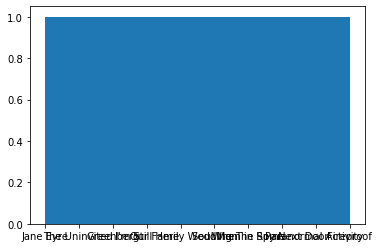

In [31]:
df_least = df.sort_values(['Budget (million $)','Genre'], ascending=[1,0]).head(10)
df_least[['Film','Budget (million $)']]
plt.hist(df_least['Film'])
# sns.distplot(df_least[],kde=False)

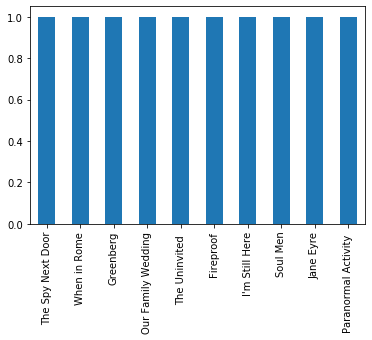

In [68]:
df_lll = df.sort_values(['Budget (million $)','Genre'], ascending=[1,0]).head(10)
df_lll[['Film','Budget (million $)']]
df_lll['Film'].value_counts().plot.bar()
plt.show()

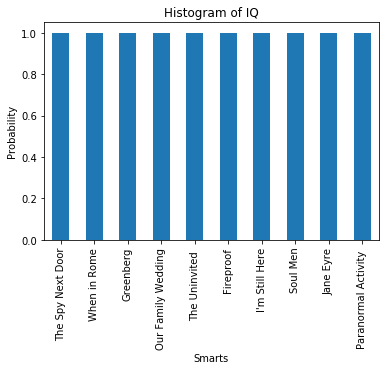

In [35]:
# df_least = df.sort_values(['Budget (million $)','Genre'], ascending=[1,0]).head(10)
# df_least['Film']
# n, bins, patches = plt.hist(df_least['Film'], 50, density=True, facecolor='g', alpha=0.75)
# # df_least = pd.DataFrame({"num" : np.random.randint(20, size=250),
# #                   "str" : np.random.choice(["cat", "dog", "pig"], 
# #                                            size=250, p=[.2,.3,.5])})

# df_least['Film'].value_counts().plot.bar()
# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title('Histogram of IQ')
# plt.show()



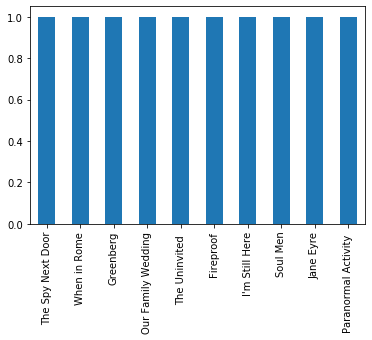

In [75]:
x1 = df_least['Film']
x1
y1 = df['Budget (million $)']
y1
df_least['Film'].value_counts().plot.bar(x1,y1,align='center')
plt.show()

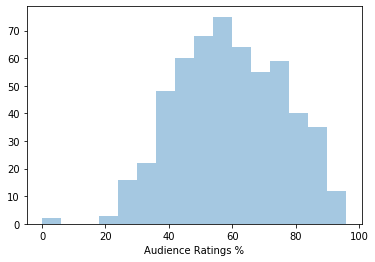

In [106]:
sns.distplot(df['Audience Ratings %'],kde=False)

(array([  2.,   1.,  14.,  53.,  81., 124., 105.,  87.,  64.,  28.]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <a list of 10 Patch objects>)

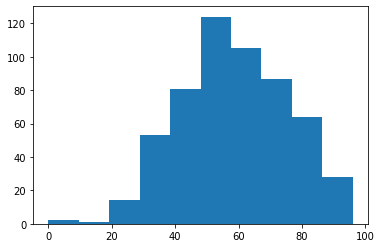

In [158]:
plt.hist(df['Audience Ratings %'])

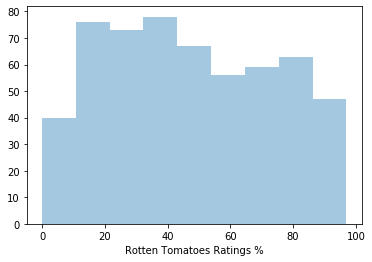

In [99]:
sns.distplot(df['Rotten Tomatoes Ratings %'],kde=False)

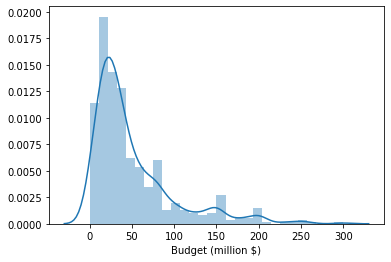

In [107]:
sns.distplot(df['Budget (million $)'])

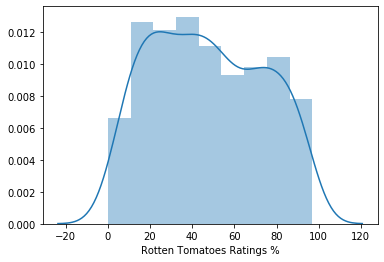

In [108]:
sns.distplot(df['Rotten Tomatoes Ratings %'])

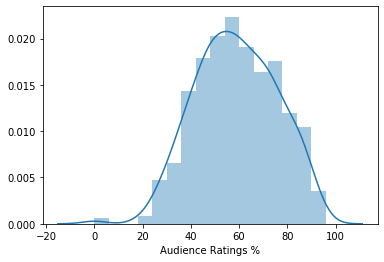

In [109]:
sns.distplot(df['Audience Ratings %'])

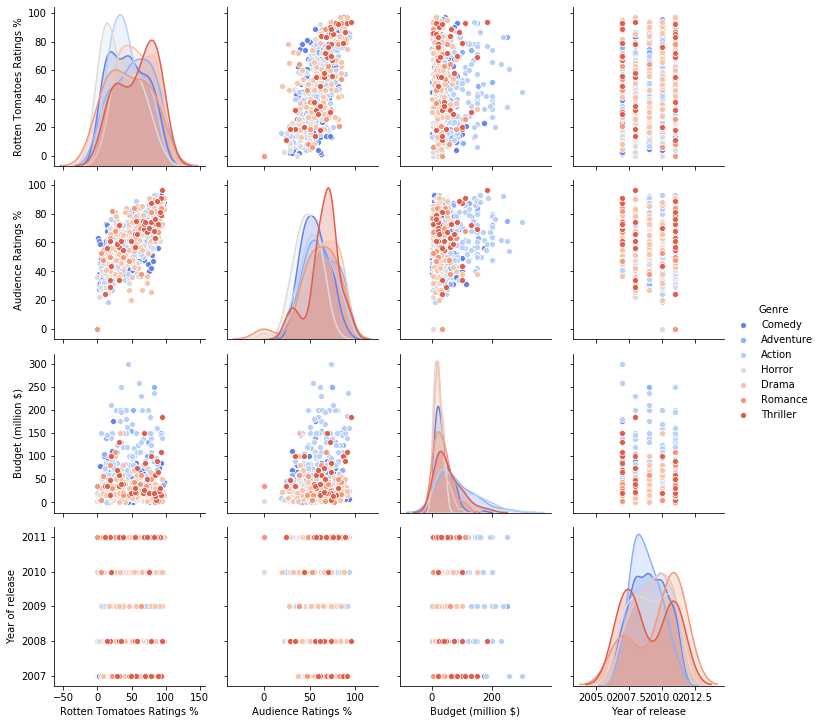

In [102]:
sns.pairplot(df,hue='Genre',palette='coolwarm')

(array([38., 64., 75., 53., 68., 64., 43., 54., 57., 43.]),
 array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ]),
 <a list of 10 Patch objects>)

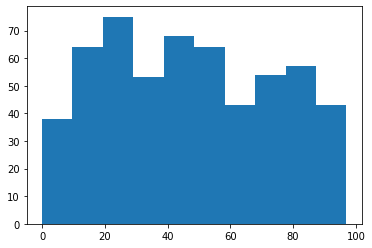

In [110]:
plt.hist(df['Rotten Tomatoes Ratings %'])

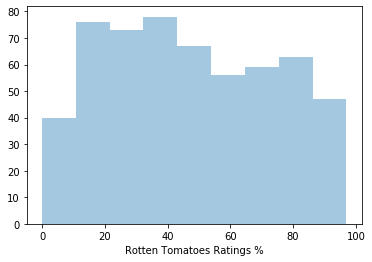

In [112]:
sns.distplot((df['Rotten Tomatoes Ratings %']), kde=False);

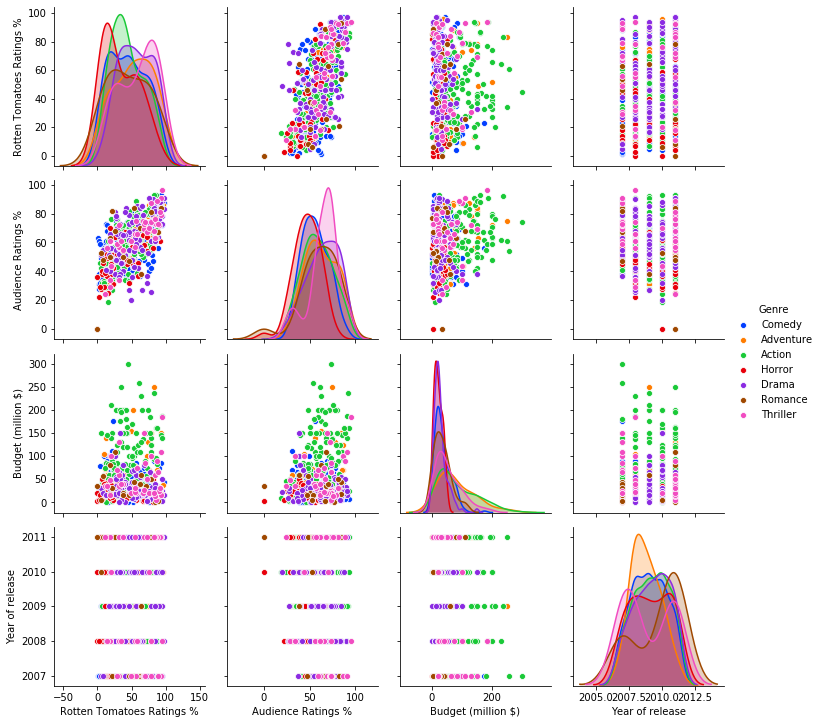

In [103]:
sns.pairplot(df,hue='Genre',palette='bright')

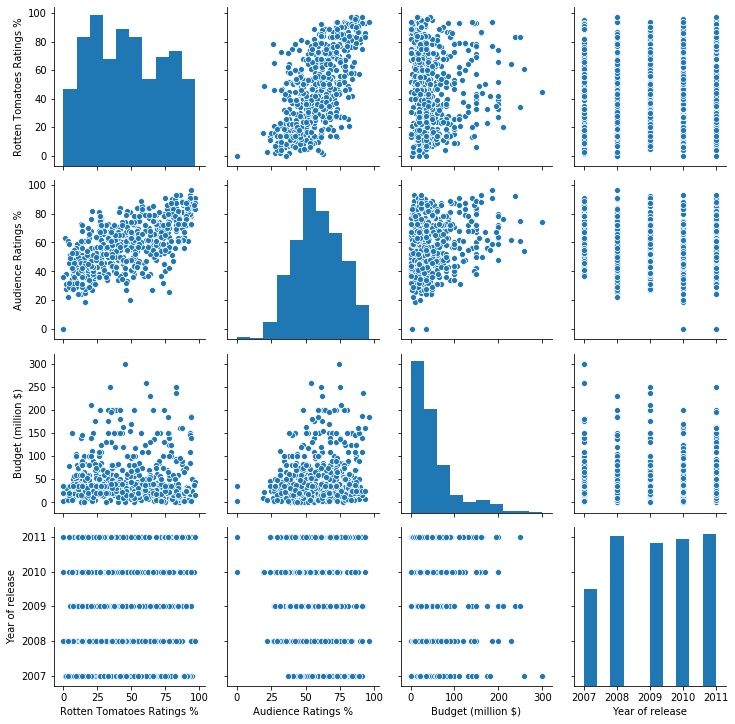

In [105]:
sns.pairplot(df)

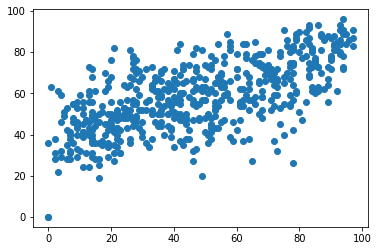

In [174]:
x = df['Rotten Tomatoes Ratings %']
y = df['Audience Ratings %']
plt.scatter(x,y)

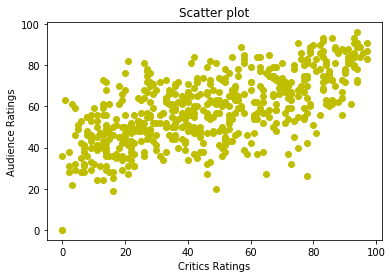

In [49]:
x = df['Rotten Tomatoes Ratings %']
y = df['Audience Ratings %']
plt.scatter(x, y, marker='o', color='y')
plt.title('Scatter plot')
plt.xlabel('Critics Ratings')
plt.ylabel('Audience Ratings')
plt.show()

In [5]:
df.groupby('Genre').count()['Film']

Genre
Action       154
Adventure     29
Comedy       172
Drama        101
Horror        49
Romance       18
Thriller      36
Name: Film, dtype: int64

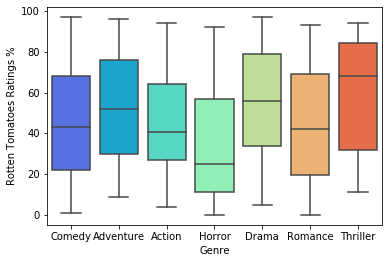

In [54]:
sns.boxplot(x='Genre', y='Rotten Tomatoes Ratings %', data=df,palette='rainbow')

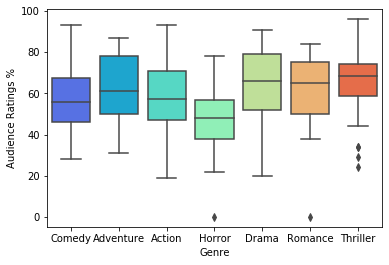

In [55]:
sns.boxplot(x='Genre', y='Audience Ratings %', data=df,palette='rainbow')

ValueError: could not convert string to float: 'Comedy'

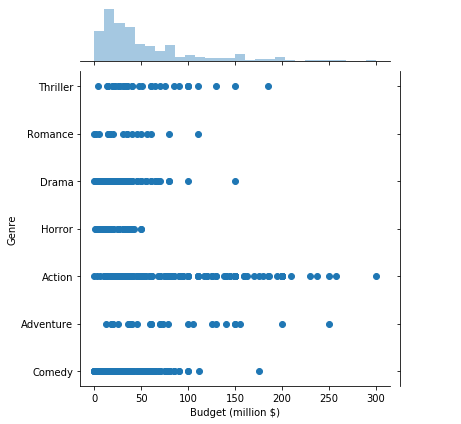

In [62]:
sns.jointplot(x='Budget (million $)',y='Genre',data=df,kind='scatter')

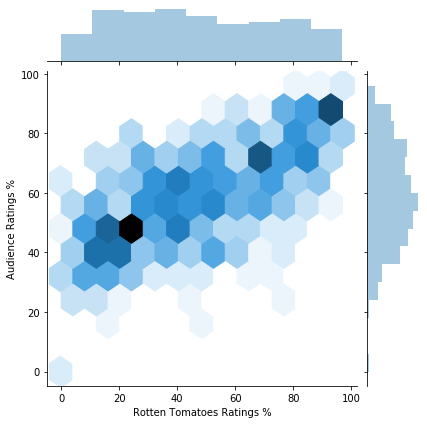

In [60]:
sns.jointplot(x='Rotten Tomatoes Ratings %',y='Audience Ratings %',data=df,kind='hex')